# Time Series Analysis FINAL

## Blue it, earn it

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

### Check if the NAs in Vol. is filled

In [147]:
data = pd.read_csv("dj_moving_average_test.csv")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,31-Dec-19,28538.44,28414.64,28547.35,28376.49,193.34,0.27
1,30-Dec-19,28462.14,28654.76,28664.69,28428.98,185.07,-0.64
2,27-Dec-19,28645.26,28675.34,28701.66,28608.98,184.93,0.08
3,26-Dec-19,28621.39,28539.46,28624.10,28535.15,155.97,0.37
4,24-Dec-19,28515.45,28572.57,28576.80,28503.21,95.29,-0.13
5,23-Dec-19,28551.53,28491.78,28582.49,28491.78,233.47,0.34
6,20-Dec-19,28455.09,28608.64,28608.64,28445.60,603.78,0.28
7,19-Dec-19,28376.96,28278.31,28381.48,28278.24,262.57,0.49
8,18-Dec-19,28239.28,28291.44,28323.25,28239.28,289.89,-0.10
9,17-Dec-19,28267.16,28221.75,28328.63,28220.56,286.77,0.11


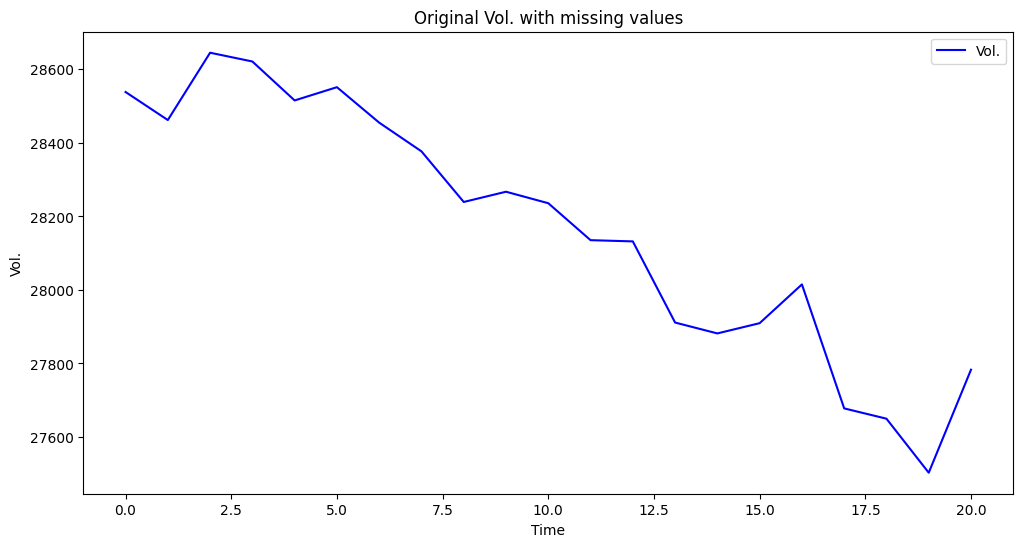

In [148]:
plt.figure(figsize=(12, 6))
plt.plot(data["Price"], label='Vol.', color='blue')
plt.title('Original Vol. with missing values')
plt.xlabel('Time')
plt.ylabel('Vol.')
plt.legend()
plt.show()


In [149]:
data = pd.read_csv("dj_moving_average_train.csv")
data


,Date,Price,Open,High,Low,Vol.,Change %
0,29-Nov-19,28051.41,28103.16,28119.51,28042.53,122.620,-0.40
1,27-Nov-19,28164.00,28156.47,28174.97,28075.23,198.210,0.15
2,26-Nov-19,28121.68,28080.75,28146.02,28042.21,329.800,0.20
3,25-Nov-19,28066.47,27917.77,28068.69,27917.77,248.420,0.68
4,22-Nov-19,27875.62,27831.23,27898.46,27773.98,218.580,0.39
...,...,...,...,...,...,...,...
2740,9-Jan-09,8599.18,8738.80,8800.45,8541.75,474.686,-1.64
2741,8-Jan-09,8742.46,8769.94,8807.14,8593.52,483.574,-0.31
2742,7-Jan-09,8769.70,8996.94,8996.94,8690.45,484.104,-2.72
2743,6-Jan-09,9015.10,8954.57,9175.19,8868.07,475.532,0.69


In [150]:
data = pd.read_csv("clean_dj.csv")
data


,Date,Price,Open,High,Low,Vol.,Change %
0,31-Dec-19,28538.44,28414.64,28547.35,28376.49,193.34,0.27
1,30-Dec-19,28462.14,28654.76,28664.69,28428.98,185.07,-0.64
2,27-Dec-19,28645.26,28675.34,28701.66,28608.98,184.93,0.08
3,26-Dec-19,28621.39,28539.46,28624.10,28535.15,155.97,0.37
4,24-Dec-19,28515.45,28572.57,28576.80,28503.21,95.29,-0.13
...,...,...,...,...,...,...,...
2761,9-Jan-09,8599.18,8738.80,8800.45,8541.75,NaN,-1.64
2762,8-Jan-09,8742.46,8769.94,8807.14,8593.52,NaN,-0.31
2763,7-Jan-09,8769.70,8996.94,8996.94,8690.45,NaN,-2.72
2764,6-Jan-09,9015.10,8954.57,9175.19,8868.07,NaN,0.69


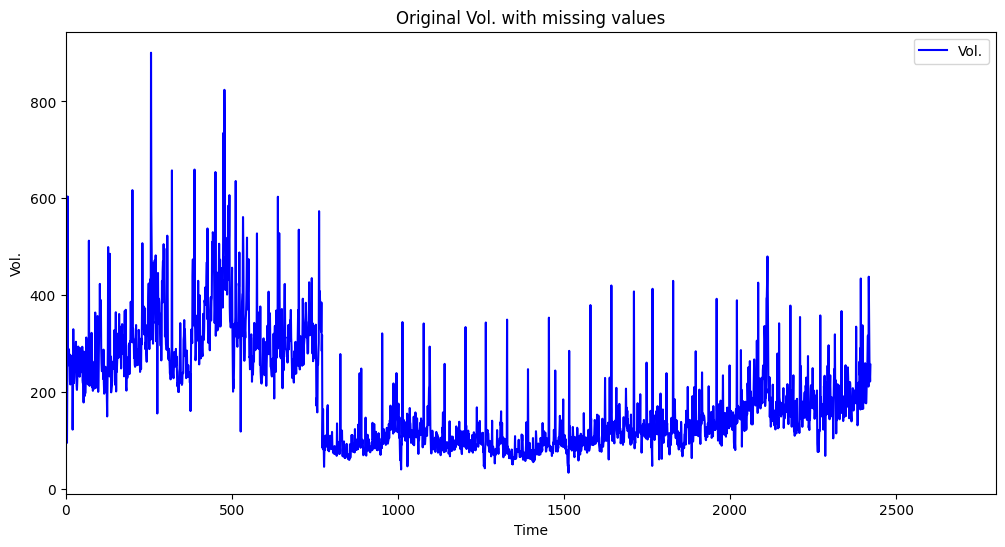

In [151]:
plt.figure(figsize=(12, 6))
plt.plot(data["Vol."], label='Vol.', color='blue')
plt.title('Original Vol. with missing values')
plt.xlabel('Time')
plt.ylabel('Vol.')
plt.xlim(0, 2800)
plt.legend()
plt.show()


### Build LSTM

X shape: (2685, 60, 5), y shape: (2685,)
Epoch 1/100


C:\Users\User\AppData\Local\Temp\ipykernel_20124\3346965660.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0222 - val_loss: 0.0036
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0017 - val_loss: 5.9447e-04
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0015 - val_loss: 5.7345e-04
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0014 - val_loss: 6.8911e-04
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


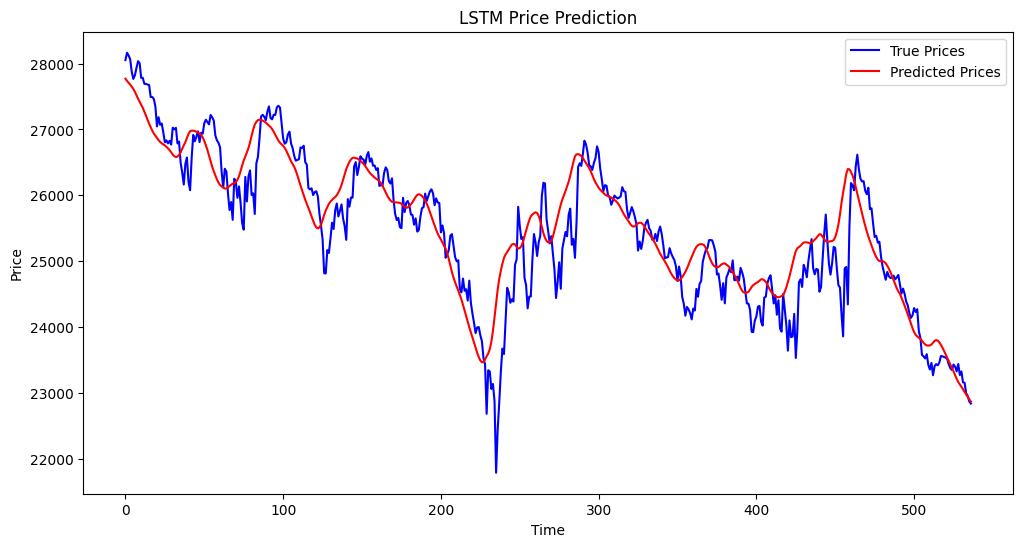

In [152]:
data = pd.read_csv("dj_moving_average_train.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
features = ['Price', 'Open', 'High', 'Low', 'Vol.']
data_features = data[features]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_features)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

SEQ_LENGTH = 60
X, y = create_sequences(data_scaled, SEQ_LENGTH)
print(f"X shape: {X.shape}, y shape: {y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2), 
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1) 
])

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=2,          
    restore_best_weights=True  
)

history = model.fit(
    X_train, y_train,
    epochs=100, 
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)
# print("Training history:", history.history)

predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(
    np.hstack([predicted.reshape(-1, 1), np.zeros((len(predicted), data_scaled.shape[1] - 1))])
)[:, 0]

true_prices = scaler.inverse_transform(
    np.hstack([y_test.reshape(-1, 1), np.zeros((len(y_test), data_scaled.shape[1] - 1))])
)[:, 0]

plt.figure(figsize=(12, 6))
plt.plot(true_prices[::-1], label='True Prices', color='blue')
plt.plot(predicted_prices[::-1], label='Predicted Prices', color='red')
plt.title('LSTM Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

model.save('lstm.h5')


### Verify LSTM

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


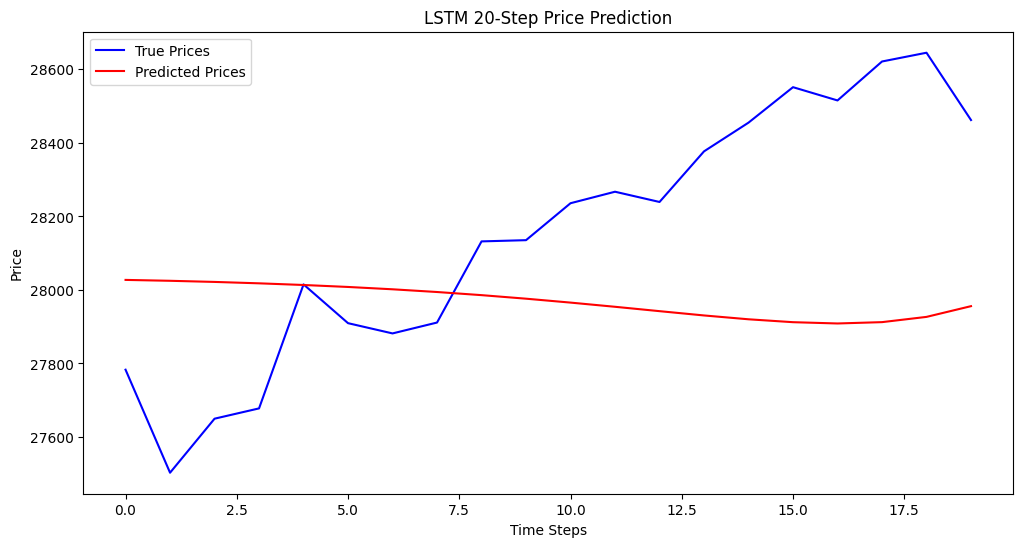

In [153]:
model = load_model('lstm.h5')
data = pd.read_csv('dj_moving_average_test.csv')
features = ['Price', 'Open', 'High', 'Low', 'Vol.']
data_features = data[features].values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_features)

SEQ_LENGTH = min(60, len(data_scaled)) 
PREDICTION_LENGTH = 20
last_sequence = data_scaled[-SEQ_LENGTH:].reshape(1, SEQ_LENGTH, len(features))
future_predictions = []
current_sequence = last_sequence.copy()

for _ in range(PREDICTION_LENGTH):
    prediction = model.predict(current_sequence)[0, 0]
    future_predictions.append(prediction)
    new_row = current_sequence[0, -1, :].copy()
    new_row[0] = prediction 
    current_sequence = np.roll(current_sequence, -1, axis=1) 
    current_sequence[0, -1, :] = new_row 

future_predictions_scaled = scaler.inverse_transform(
    np.hstack([np.array(future_predictions).reshape(-1, 1),
               np.zeros((PREDICTION_LENGTH, len(features) - 1))])
)[:, 0]
true_values = data_features[-PREDICTION_LENGTH:, 0]

plt.figure(figsize=(12, 6))
plt.plot(range(PREDICTION_LENGTH), true_values[::-1], label='True Prices', color='blue')
plt.plot(range(PREDICTION_LENGTH), future_predictions_scaled[::-1], label='Predicted Prices', color='red')
plt.title('LSTM 20-Step Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()


In [154]:
data2 = pd.read_csv("dj_moving_average_train.csv")
price = data2["Price"].to_numpy()
price_inverse = []
for i in range(len(price)):
    price_inverse.append(price[-1-i])

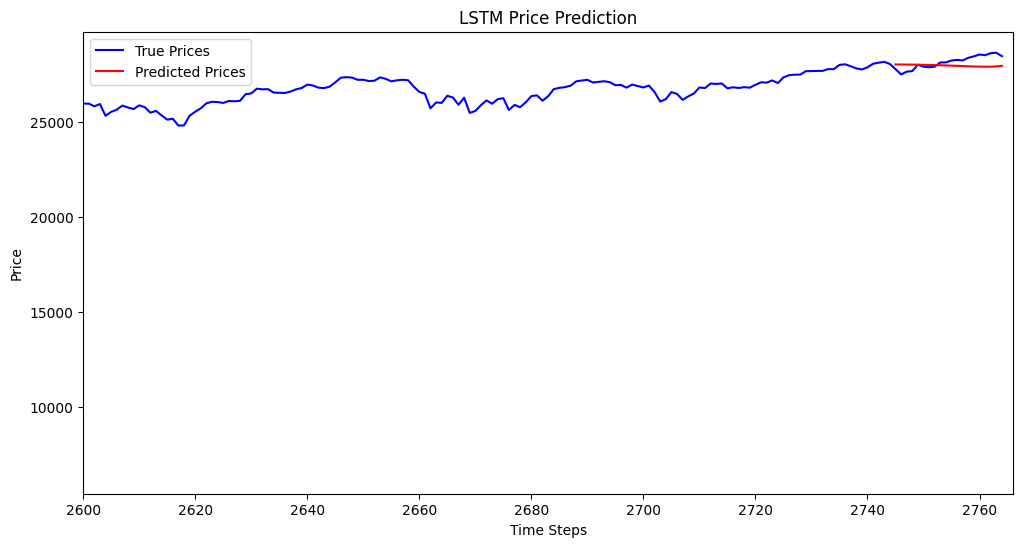

In [155]:
true_length = len(np.hstack((price_inverse, true_values)))
predicted_length = len(future_predictions_scaled)
shifted_time = np.arange(true_length - predicted_length, true_length)

plt.figure(figsize=(12, 6))
plt.plot(np.hstack((price_inverse, true_values[::-1])), label='True Prices', color='blue')
plt.plot(shifted_time, future_predictions_scaled[::-1], label='Predicted Prices', color='red')
plt.title('LSTM Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.xlim(2600, 2766)

plt.show()

In [156]:
true_values

array([28462.14, 28645.26, 28621.39, 28515.45, 28551.53, 28455.09,
       28376.96, 28239.28, 28267.16, 28235.89, 28135.38, 28132.05,
       27911.3 , 27881.72, 27909.6 , 28015.06, 27677.79, 27649.78,
       27502.81, 27783.04])

In [157]:
future_predictions_scaled

array([27955.87643221, 27926.69203507, 27912.4105044 , 27908.78306636,
       27912.27608423, 27920.1684347 , 27930.60863991, 27942.28600101,
       27954.17003142, 27965.56272001, 27976.19856309, 27985.84838585,
       27994.36809857, 28001.75742887, 28008.10881615, 28013.46199405,
       28017.98624754, 28021.80646344, 28024.88076315, 28027.29300604])

### MAPE of LSTM

In [158]:
tmp = 0
for i in range(len(true_values)):
    tmp += abs((true_values[i] - future_predictions_scaled[i]) / true_values[i])

mape_lstm = tmp / len(true_values) * 100
print(f"MAPE of LSTM =  {mape_lstm:.4f} %")

MAPE of LSTM =  1.2612 %


### Build RNN

X shape: (2685, 60, 5), y shape: (2685,)
Epoch 1/100


C:\Users\User\AppData\Local\Temp\ipykernel_20124\1435984297.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0351 - val_loss: 0.0016
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - val_loss: 9.4022e-04
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - val_loss: 0.0010
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - val_loss: 4.3764e-04
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - val_loss: 8.0785e-04
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - val_loss: 0.0017
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


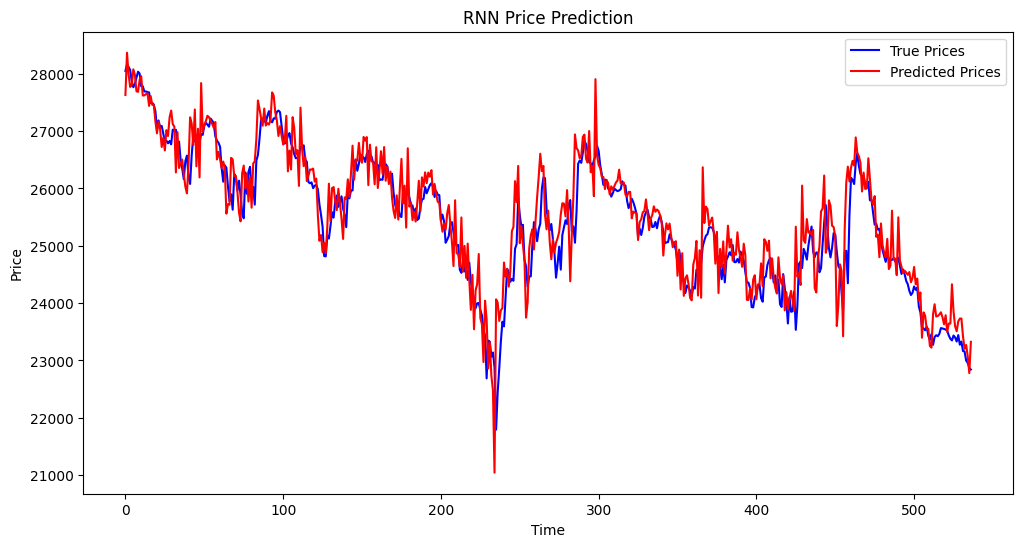

In [159]:
data = pd.read_csv("dj_moving_average_train.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
features = ['Price', 'Open', 'High', 'Low', 'Vol.']
data_features = data[features]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_features)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

SEQ_LENGTH = 60
X, y = create_sequences(data_scaled, SEQ_LENGTH)
print(f"X shape: {X.shape}, y shape: {y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1) 
])

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,        
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100, 
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)
# print("Training history:", history.history)

predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(
    np.hstack([predicted.reshape(-1, 1), np.zeros((len(predicted), data_scaled.shape[1] - 1))])
)[:, 0]
true_prices = scaler.inverse_transform(
    np.hstack([y_test.reshape(-1, 1), np.zeros((len(y_test), data_scaled.shape[1] - 1))])
)[:, 0]

plt.figure(figsize=(12, 6))
plt.plot(true_prices[::-1], label='True Prices', color='blue')
plt.plot(predicted_prices[::-1], label='Predicted Prices', color='red')
plt.title('RNN Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

model.save('rnn.h5')


### Verify RNN

In [160]:
data2 = pd.read_csv("dj_moving_average_train.csv")
price = data2["Price"].to_numpy()
price_inverse = []
for i in range(len(price)):
    price_inverse.append(price[-1-i])

Model input shape: (None, 60, 5)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


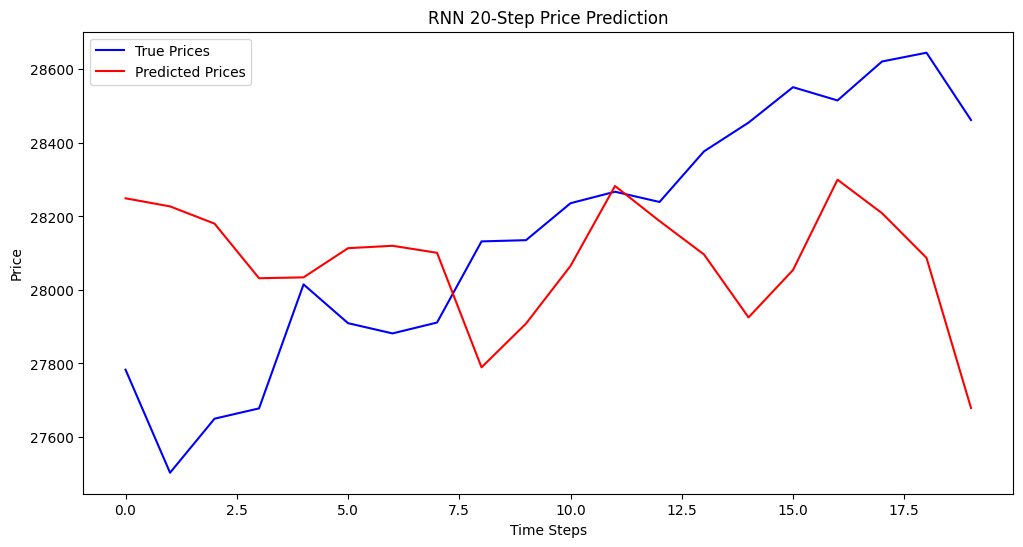

In [161]:
model = load_model('rnn.h5')
data = pd.read_csv('dj_moving_average_test.csv')
features = ['Price', 'Open', 'High', 'Low', 'Vol.']
data_features = data[features].values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_features)
print("Model input shape:", model.input_shape)

SEQ_LENGTH = min(60, len(data_scaled)) 
PREDICTION_LENGTH = 20
last_sequence = data_scaled[-SEQ_LENGTH:].reshape(1, SEQ_LENGTH, len(features))
future_predictions = []
current_sequence = last_sequence.copy()

for _ in range(PREDICTION_LENGTH):
    prediction = model.predict(current_sequence)[0, 0]
    future_predictions.append(prediction)
    new_row = current_sequence[0, -1, :].copy() 
    new_row[0] = prediction
    current_sequence = np.roll(current_sequence, -1, axis=1)
    current_sequence[0, -1, :] = new_row 

future_predictions_scaled = scaler.inverse_transform(
    np.hstack([np.array(future_predictions).reshape(-1, 1),
               np.zeros((PREDICTION_LENGTH, len(features) - 1))])
)[:, 0]

true_values = data_features[-PREDICTION_LENGTH:, 0]

plt.figure(figsize=(12, 6))
plt.plot(true_values[::-1], label='True Prices', color='blue')
plt.plot(future_predictions_scaled[::-1], label='Predicted Prices', color='red')
plt.title('RNN 20-Step Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()


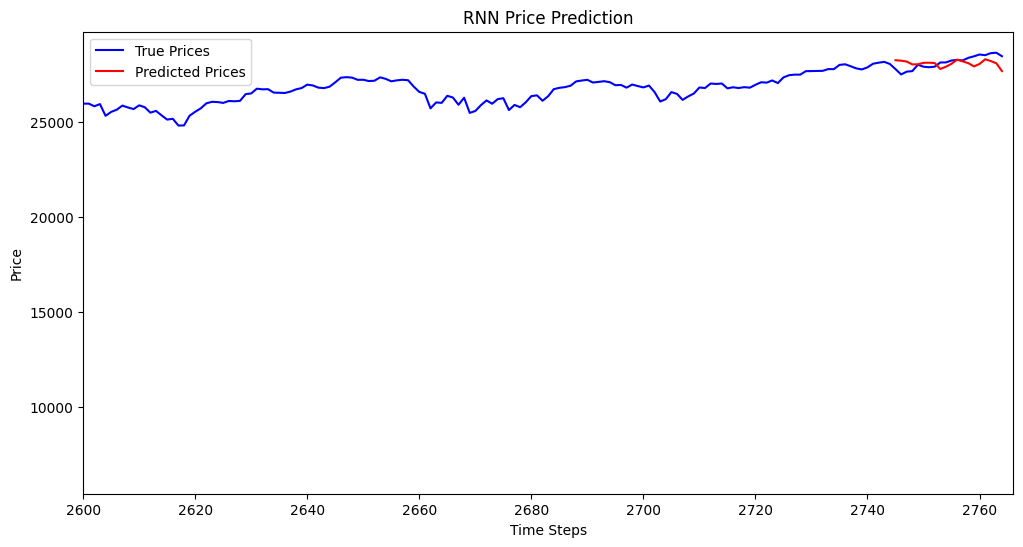

In [162]:
true_length = len(np.hstack((price_inverse, true_values)))
predicted_length = len(future_predictions_scaled)
shifted_time = np.arange(true_length - predicted_length, true_length)

plt.figure(figsize=(12, 6))
plt.plot(np.hstack((price_inverse, true_values[::-1])), label='True Prices', color='blue')
plt.plot(shifted_time, future_predictions_scaled[::-1], label='Predicted Prices', color='red')
plt.title('RNN Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.xlim(2600, 2766)

plt.show()

In [163]:
true_values

array([28462.14, 28645.26, 28621.39, 28515.45, 28551.53, 28455.09,
       28376.96, 28239.28, 28267.16, 28235.89, 28135.38, 28132.05,
       27911.3 , 27881.72, 27909.6 , 28015.06, 27677.79, 27649.78,
       27502.81, 27783.04])

In [164]:
future_predictions_scaled

array([27678.85887324, 28087.26544526, 28208.8275877 , 28299.88676915,
       28054.1560335 , 27925.29744278, 28096.46859672, 28187.43183185,
       28282.75119311, 28065.33493681, 27908.51923102, 27789.45697015,
       28101.05113981, 28120.10986405, 28113.57924987, 28034.20931215,
       28031.83789241, 28180.33759265, 28227.26351209, 28249.25312728])

### MAPE of RNN

In [165]:
tmp = 0
for i in range(len(true_values)):
    tmp += abs((true_values[i] - future_predictions_scaled[i]) / true_values[i])

mape_rnn = tmp / len(true_values) * 100

print(f"MAPE of RNN =  {mape_rnn:.4f} %")

MAPE of RNN =  1.2100 %


### Overall Comparison

In [166]:
print(f"MAPE of LSTM = {mape_lstm:.4f} %")
print(f"MAPE of RNN = {mape_rnn:.4f} %")

MAPE of LSTM = 1.2612 %
MAPE of RNN = 1.2100 %
